pip install nltk textblob

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Step 1: Preprocessing the data...
Loaded dataset with 1893 rows.

Step 2: Analyzing with TextBlob...
Analysis complete.

Step 3: Evaluating predictions...
Type Accuracy: 0.8114
Factual/Subjective Accuracy: 0.5911
Sentiment Accuracy: 0.4342

Type Classification Report:
              precision    recall  f1-score   support

 Affirmation       0.80      0.94      0.87      1213
    Negation       0.85      0.57      0.69       680

    accuracy                           0.81      1893
   macro avg       0.83      0.76      0.78      1893
weighted avg       0.82      0.81      0.80      1893


Factual/Subjective Classification Report:
              precision    recall  f1-score   support

     Factual       0.51      0.83      0.63       807
  Subjective       0.77      0.41      0.54      1086

    accuracy                           0.59      1893
   macro avg       0.64      0.62      0.59      1893
weighted avg       0.66      0.59      0.58      1893


Sentiment Classification Report:


c:\Users\andre\miniconda3\envs\miaa\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\miniconda3\envs\miaa\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\miniconda3\envs\miaa\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


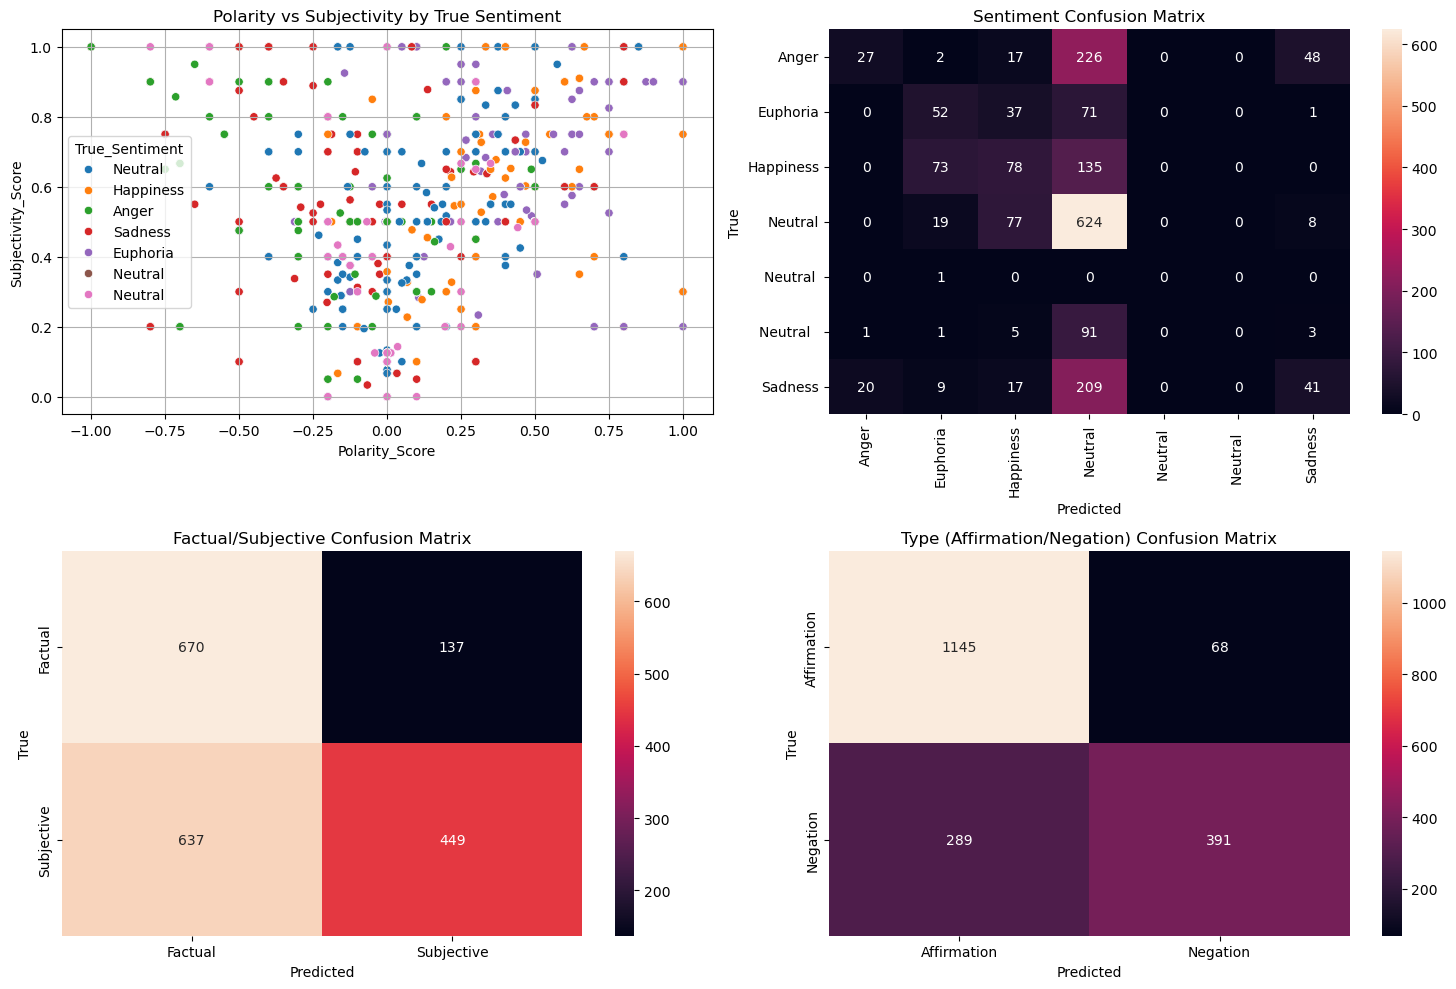


Sample Results:
                                Sentence True_Sentiment Predicted_Sentiment  \
0                       The sky is blue.        Neutral             Neutral   
1                     I love sunny days!      Happiness            Euphoria   
2              This pizza is disgusting.          Anger               Anger   
3    Water boils at 100 degrees Celsius.        Neutral             Neutral   
4     I don't think this is a good idea.        Sadness            Euphoria   
5   She never comes to meetings on time.          Anger             Neutral   
6  This is the best book I've ever read!       Euphoria            Euphoria   
7          That was not a fair decision.          Anger             Sadness   
8         The train will arrive at 5 PM.        Neutral             Neutral   
9          I hate when it rains all day.        Sadness               Anger   

   Polarity_Score  Subjectivity_Score  
0           0.000                 0.1  
1           0.625                

In [4]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Function to preprocess the data
def preprocess_data(file_path):
    """
    Preprocess the dataset: load, clean, and prepare it for analysis.
    """
    # Load the dataset (assuming CSV format)
    try:
        # Try standard CSV format first
        df = pd.read_csv(file_path)
    except:
        # If that fails, try with different delimiter or formatting
        df = pd.read_csv(file_path, sep=',(?=(?:[^"]*"[^"]*")*[^"]*$)', engine='python')
    
    # Clean column names (remove any whitespace)
    df.columns = df.columns.str.strip()
    
    # Ensure the required columns exist
    required_columns = ['Sentence', 'Type', 'Factual/Subjective', 'Sentiment']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Required column '{col}' not found in the dataset")
    
    return df

# Function to analyze sentences using TextBlob
def analyze_with_textblob(df):
    """
    Use TextBlob to analyze each sentence for polarity and subjectivity.
    """
    # Create new columns for TextBlob predictions
    results = []
    
    for _, row in df.iterrows():
        sentence = row['Sentence']
        blob = TextBlob(sentence)
        
        # Get polarity and subjectivity scores
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        # Determine predicted sentiment based on polarity
        if polarity > 0.3:
            if polarity > 0.6:
                predicted_sentiment = 'Euphoria'
            else:
                predicted_sentiment = 'Happiness'
        elif polarity < -0.3:
            if polarity < -0.6:
                predicted_sentiment = 'Anger'
            else:
                predicted_sentiment = 'Sadness'
        else:
            predicted_sentiment = 'Neutral'
        
        # Determine predicted factual/subjective
        predicted_factual_subjective = 'Subjective' if subjectivity > 0.5 else 'Factual'
        
        # Simple negation detection (could be improved)
        contains_negation = any(neg_word in sentence.lower() for neg_word in 
                               ["not", "don't", "doesn't", "didn't", "no", "never", "cannot", "can't", "won't"])
        predicted_type = 'Negation' if contains_negation else 'Affirmation'
        
        results.append({
            'Sentence': sentence,
            'True_Type': row['Type'],
            'True_Factual_Subjective': row['Factual/Subjective'],
            'True_Sentiment': row['Sentiment'],
            'Predicted_Type': predicted_type,
            'Predicted_Factual_Subjective': predicted_factual_subjective,
            'Predicted_Sentiment': predicted_sentiment,
            'Polarity_Score': polarity,
            'Subjectivity_Score': subjectivity
        })
    
    return pd.DataFrame(results)

# Function to evaluate the model
def evaluate_predictions(df_results):
    """
    Evaluate the TextBlob predictions against the true labels.
    """
    # Calculate accuracy for each category
    type_accuracy = accuracy_score(df_results['True_Type'], df_results['Predicted_Type'])
    factual_subjective_accuracy = accuracy_score(
        df_results['True_Factual_Subjective'], 
        df_results['Predicted_Factual_Subjective']
    )
    sentiment_accuracy = accuracy_score(df_results['True_Sentiment'], df_results['Predicted_Sentiment'])
    
    print(f"Type Accuracy: {type_accuracy:.4f}")
    print(f"Factual/Subjective Accuracy: {factual_subjective_accuracy:.4f}")
    print(f"Sentiment Accuracy: {sentiment_accuracy:.4f}")
    
    # Detailed classification reports
    print("\nType Classification Report:")
    print(classification_report(df_results['True_Type'], df_results['Predicted_Type']))
    
    print("\nFactual/Subjective Classification Report:")
    print(classification_report(df_results['True_Factual_Subjective'], df_results['Predicted_Factual_Subjective']))
    
    print("\nSentiment Classification Report:")
    print(classification_report(df_results['True_Sentiment'], df_results['Predicted_Sentiment']))
    
    return {
        'type_accuracy': type_accuracy,
        'factual_subjective_accuracy': factual_subjective_accuracy,
        'sentiment_accuracy': sentiment_accuracy
    }

# Function to visualize the results
def visualize_results(df_results):
    """
    Create visualizations to better understand the results.
    """
    # Set up the figure
    plt.figure(figsize=(15, 10))
    
    # 1. Plot polarity vs subjectivity
    plt.subplot(2, 2, 1)
    sns.scatterplot(
        x='Polarity_Score', 
        y='Subjectivity_Score', 
        hue='True_Sentiment',
        data=df_results
    )
    plt.title('Polarity vs Subjectivity by True Sentiment')
    plt.grid(True)
    
    # 2. Confusion matrix for sentiment
    plt.subplot(2, 2, 2)
    sentiment_cm = confusion_matrix(df_results['True_Sentiment'], df_results['Predicted_Sentiment'])
    sns.heatmap(
        sentiment_cm, 
        annot=True, 
        fmt='d', 
        xticklabels=sorted(df_results['True_Sentiment'].unique()),
        yticklabels=sorted(df_results['True_Sentiment'].unique())
    )
    plt.title('Sentiment Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # 3. Confusion matrix for Factual/Subjective
    plt.subplot(2, 2, 3)
    fs_cm = confusion_matrix(
        df_results['True_Factual_Subjective'], 
        df_results['Predicted_Factual_Subjective']
    )
    sns.heatmap(
        fs_cm, 
        annot=True, 
        fmt='d', 
        xticklabels=sorted(df_results['True_Factual_Subjective'].unique()),
        yticklabels=sorted(df_results['True_Factual_Subjective'].unique())
    )
    plt.title('Factual/Subjective Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # 4. Confusion matrix for Type
    plt.subplot(2, 2, 4)
    type_cm = confusion_matrix(df_results['True_Type'], df_results['Predicted_Type'])
    sns.heatmap(
        type_cm, 
        annot=True, 
        fmt='d', 
        xticklabels=sorted(df_results['True_Type'].unique()),
        yticklabels=sorted(df_results['True_Type'].unique())
    )
    plt.title('Type (Affirmation/Negation) Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.tight_layout()
    plt.show()

# Main function to run the analysis
def main(file_path):
    """
    Main function to orchestrate the analysis process.
    """
    print("Step 1: Preprocessing the data...")
    df = preprocess_data(file_path)
    print(f"Loaded dataset with {len(df)} rows.")
    
    print("\nStep 2: Analyzing with TextBlob...")
    df_results = analyze_with_textblob(df)
    print("Analysis complete.")
    
    print("\nStep 3: Evaluating predictions...")
    metrics = evaluate_predictions(df_results)
    
    print("\nStep 4: Visualizing results...")
    visualize_results(df_results)
    
    return df_results

# Example usage
if __name__ == "__main__":
    # Replace with your dataset path
    file_path = "dataset.csv"
    results = main(file_path)
    
    # Display some sample results
    print("\nSample Results:")
    print(results[['Sentence', 'True_Sentiment', 'Predicted_Sentiment', 
                   'Polarity_Score', 'Subjectivity_Score']].head(10))